<a href="https://colab.research.google.com/github/NourNWN/Billing_System/blob/main/DM_HOMEWORK_1_BY_%5Byour_name%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Your_name]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [98]:
# here put every import you need e.g. import pandas
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

Download data

In [99]:
street_data = pd.read_csv('chicago-street-center-lines.csv')
police_data = pd.read_csv('chicago-police-beat-boundries.csv')
cbd_data = pd.read_csv('chicago-CBD-boundary.csv')
crashes_data = pd.read_csv('traffic-crashes.csv')
origin_people_data = pd.read_csv('traffic-crashes-people.csv')
vehicles_data = pd.read_csv('traffic-crashes-vehicles.csv')

<ipython-input-99-ddb0b3ff690f>:5: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_people_data = pd.read_csv('traffic-crashes-people.csv')
<ipython-input-99-ddb0b3ff690f>:6: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_data = pd.read_csv('traffic-crashes-vehicles.csv')


<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>


<div dir="rtl">الاستنتاج<div>

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1] chicago-street-center-lines

In [100]:
street_data

,the_geom,FNODE_ID,TNODE_ID,TRANS_ID,PRE_DIR,STREET_NAM,STREET_TYP,SUF_DIR,STREETNAME,L_F_ADD,...,EDIT_DATE,EDIT_TYPE,FLAG_STRIN,EWNS_DIR,EWNS_COORD,CREATE_USE,CREATE_TIM,UPDATE_USE,UPDATE_TIM,SHAPE_LEN
0,MULTILINESTRING ((-87.63187018232667 41.780809...,10809,16581,127104,S,YALE,AVE,NaN,1782,0,...,0,NaN,NaN,W,232,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,220.566012
1,MULTILINESTRING ((-87.60548932047061 41.762229...,6501,34082,128895,S,COTTAGE GROVE,AVE,NaN,1236,7301,...,0,NaN,NaN,NaN,0,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,664.774607
2,MULTILINESTRING ((-87.68381848191974 41.697243...,15338,22358,142645,S,CAMPBELL,AVE,NaN,1177,10801,...,0,NaN,NaN,W,2500,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,665.378453
3,MULTILINESTRING ((-87.645841892972 41.69339840...,15799,28881,148189,S,SANGAMON,ST,NaN,1696,0,...,0,NaN,NaN,W,932,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,152.564966
4,MULTILINESTRING ((-87.67053671318457 41.679759...,36407,36534,139728,W,118TH,ST,NaN,1823,1933,...,0,NaN,NaN,S,11800,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,332.691382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,30115,13289,154843,S,INGLESIDE,AVE,NaN,1449,5701,...,20030328,NaN,NaN,E,930,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,03/28/2003 08:00:00 AM +0000,665.075339
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,24893,627,154508,E,134TH,ST,NaN,65,2636,...,20071130,Cross Street Change,NaN,S,13400,EXISTING,01/01/1999 08:00:00 AM +0000,ds06027,11/05/2008 08:00:00 AM +0000,444.227355
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,25482,8613,126837,S,WESTERN,AVE,NaN,1770,5701,...,0,NaN,NaN,W,2400,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,676.251896
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,34359,4743,154981,S,KREITER,AVE,NaN,1498,9401,...,20020709,NaN,NaN,E,3526,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,07/09/2002 07:00:00 AM +0000,965.850439


In [101]:
street_data.columns

Index(['the_geom', 'FNODE_ID', 'TNODE_ID', 'TRANS_ID', 'PRE_DIR', 'STREET_NAM',
       'STREET_TYP', 'SUF_DIR', 'STREETNAME', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD',
       'R_T_ADD', 'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT', 'CLASS',
       'STATUS', 'STATUS_DAT', 'TIERED', 'ONEWAY_DIR', 'DIR_TRAVEL', 'EWNS',
       'L_PARITY', 'R_PARITY', 'F_ZLEV', 'T_ZLEV', 'L_FIPS', 'R_FIPS', 'R_ZIP',
       'L_ZIP', 'R_CENSUSBL', 'L_CENSUSBL', 'F_CROSS', 'F_CROSS_ST', 'T_CROSS',
       'T_CROSS_ST', 'LENGTH', 'EDIT_DATE', 'EDIT_TYPE', 'FLAG_STRIN',
       'EWNS_DIR', 'EWNS_COORD', 'CREATE_USE', 'CREATE_TIM', 'UPDATE_USE',
       'UPDATE_TIM', 'SHAPE_LEN'],
      dtype='object')

In [102]:
street_data.shape

(55747, 49)

In [103]:
info_df = pd.DataFrame()
info_df['missing_val'] = street_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / street_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
the_geom,0,0
FNODE_ID,0,0
TNODE_ID,0,0
TRANS_ID,0,0
PRE_DIR,454,1
STREET_NAM,454,1
STREET_TYP,1254,2
SUF_DIR,53485,96
STREETNAME,0,0
L_F_ADD,0,0


نلاحظ أن الاعمدة التالية
SUF_DIR, ONEWAY_DIR, EDIT_TYPE, FLAG_STRIN  
تحتوي على نسب عالية جدا (أكثر من النصف) من ال
missing value
 لذلك سنقوم بحذفها

In [104]:
street_data.drop(['SUF_DIR', 'EDIT_TYPE', 'FLAG_STRIN'], axis=1, inplace=True)

In [105]:
street_data.shape

(55747, 46)

In [106]:
street_data = street_data.astype({'EDIT_DATE': 'object'})
# حولنا العمود EDIT_DATE الى object لأنه عبارة عن تاريخ
street_data.dtypes

the_geom       object
FNODE_ID        int64
TNODE_ID        int64
TRANS_ID        int64
PRE_DIR        object
STREET_NAM     object
STREET_TYP     object
STREETNAME      int64
L_F_ADD         int64
L_T_ADD         int64
R_F_ADD         int64
R_T_ADD         int64
LOGICLF         int64
LOGICLT         int64
LOGICRF         int64
LOGICRT         int64
CLASS          object
STATUS         object
STATUS_DAT     object
TIERED         object
ONEWAY_DIR     object
DIR_TRAVEL     object
EWNS            int64
L_PARITY       object
R_PARITY       object
F_ZLEV          int64
T_ZLEV          int64
L_FIPS          int64
R_FIPS          int64
R_ZIP         float64
L_ZIP         float64
R_CENSUSBL      int64
L_CENSUSBL      int64
F_CROSS        object
F_CROSS_ST      int64
T_CROSS        object
T_CROSS_ST      int64
LENGTH        float64
EDIT_DATE      object
EWNS_DIR       object
EWNS_COORD      int64
CREATE_USE     object
CREATE_TIM     object
UPDATE_USE     object
UPDATE_TIM     object
SHAPE_LEN 

In [107]:
cat_columns = street_data.select_dtypes(include = ['object'])
cat_columns

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,STATUS,STATUS_DAT,TIERED,ONEWAY_DIR,DIR_TRAVEL,L_PARITY,R_PARITY,F_CROSS,T_CROSS,EDIT_DATE,EWNS_DIR,CREATE_USE,CREATE_TIM,UPDATE_USE,UPDATE_TIM
0,MULTILINESTRING ((-87.63187018232667 41.780809...,S,YALE,AVE,4,N,01/01/1999 08:00:00 AM +0000,N,S,F,O,E,245|W|ENGLEWOOD|AVE|,6250|S|||,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
1,MULTILINESTRING ((-87.60548932047061 41.762229...,S,COTTAGE GROVE,AVE,2,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,800|E|73RD|ST|,800|E|74TH|ST|,0,NaN,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
2,MULTILINESTRING ((-87.68381848191974 41.697243...,S,CAMPBELL,AVE,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,2500|W|108TH|ST|,2500|W|109TH|ST|,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
3,MULTILINESTRING ((-87.645841892972 41.69339840...,S,SANGAMON,ST,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,11024|S|||,||DEAD END||,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
4,MULTILINESTRING ((-87.67053671318457 41.679759...,W,118TH,ST,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,11800|S|VINCENNES|AVE|,11799|S|CHURCH|ST|,0,S,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,S,INGLESIDE,AVE,E,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,5699|S|||,932|E|58TH|ST|,20030328,E,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,03/28/2003 08:00:00 AM +0000
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,E,134TH,ST,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,E,O,13400|S|TORRENCE|AVE|,2641|E|||,20071130,S,EXISTING,01/01/1999 08:00:00 AM +0000,ds06027,11/05/2008 08:00:00 AM +0000
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,S,WESTERN,AVE,2,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,2400|W|57TH|ST|,2400|W|58TH|ST|,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,S,KREITER,AVE,E,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,3599|E|94TH|ST|,9500|S|CRILLY|DR|,20020709,E,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,07/09/2002 07:00:00 AM +0000


In [108]:
cat_columns.nunique()

the_geom      55747
PRE_DIR           4
STREET_NAM     1649
STREET_TYP       22
CLASS            11
STATUS            5
STATUS_DAT      143
TIERED            2
ONEWAY_DIR        4
DIR_TRAVEL        3
L_PARITY          2
R_PARITY          2
F_CROSS       48341
T_CROSS       48379
EDIT_DATE       521
EWNS_DIR          4
CREATE_USE        3
CREATE_TIM      149
UPDATE_USE        4
UPDATE_TIM      518
dtype: int64

In [109]:
pd.Series(cat_columns['STATUS'].unique())

0      N
1      P
2      V
3      C
4     UC
5    NaN
dtype: object

In [110]:
street_data.drop(['TRANS_ID', 'FNODE_ID', 'TNODE_ID', 'STREETNAME', 'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT',
                  'L_FIPS', 'R_FIPS', 'L_PARITY', 'R_PARITY','F_ZLEV', 'T_ZLEV', 'F_CROSS','F_CROSS_ST','T_CROSS',
                  'T_CROSS_ST', 'EDIT_DATE', 'CREATE_USE', 'CREATE_TIM', 'UPDATE_USE', 'UPDATE_TIM', 'STATUS_DAT',
                  'R_CENSUSBL', 'L_CENSUSBL', 'EWNS_DIR', 'EWNS_COORD', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD',
                  'R_ZIP', 'L_ZIP', 'EWNS', 'ONEWAY_DIR'], axis=1, inplace=True)

In [111]:
street_data.shape

(55747, 10)

In [112]:
street_data.columns

Index(['the_geom', 'PRE_DIR', 'STREET_NAM', 'STREET_TYP', 'CLASS', 'STATUS',
       'TIERED', 'DIR_TRAVEL', 'LENGTH', 'SHAPE_LEN'],
      dtype='object')

In [113]:
street_data

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,STATUS,TIERED,DIR_TRAVEL,LENGTH,SHAPE_LEN
0,MULTILINESTRING ((-87.63187018232667 41.780809...,S,YALE,AVE,4,N,N,F,220.566014,220.566012
1,MULTILINESTRING ((-87.60548932047061 41.762229...,S,COTTAGE GROVE,AVE,2,N,N,B,664.774635,664.774607
2,MULTILINESTRING ((-87.68381848191974 41.697243...,S,CAMPBELL,AVE,4,N,N,B,665.378484,665.378453
3,MULTILINESTRING ((-87.645841892972 41.69339840...,S,SANGAMON,ST,4,N,N,B,152.564889,152.564966
4,MULTILINESTRING ((-87.67053671318457 41.679759...,W,118TH,ST,4,N,N,B,332.691371,332.691382
...,...,...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,S,INGLESIDE,AVE,E,N,N,B,665.075375,665.075339
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,E,134TH,ST,4,N,N,B,444.227355,444.227355
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,S,WESTERN,AVE,2,N,N,B,676.251891,676.251896
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,S,KREITER,AVE,E,N,N,B,965.850461,965.850439


In [114]:
street_data.isnull().sum()

the_geom         0
PRE_DIR        454
STREET_NAM     454
STREET_TYP    1254
CLASS            0
STATUS           6
TIERED           0
DIR_TRAVEL       0
LENGTH           0
SHAPE_LEN        0
dtype: int64

In [115]:
street_data.dtypes

the_geom       object
PRE_DIR        object
STREET_NAM     object
STREET_TYP     object
CLASS          object
STATUS         object
TIERED         object
DIR_TRAVEL     object
LENGTH        float64
SHAPE_LEN     float64
dtype: object

In [116]:
cat_columns = street_data.select_dtypes(include = ['object'])
cat_columns

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,STATUS,TIERED,DIR_TRAVEL
0,MULTILINESTRING ((-87.63187018232667 41.780809...,S,YALE,AVE,4,N,N,F
1,MULTILINESTRING ((-87.60548932047061 41.762229...,S,COTTAGE GROVE,AVE,2,N,N,B
2,MULTILINESTRING ((-87.68381848191974 41.697243...,S,CAMPBELL,AVE,4,N,N,B
3,MULTILINESTRING ((-87.645841892972 41.69339840...,S,SANGAMON,ST,4,N,N,B
4,MULTILINESTRING ((-87.67053671318457 41.679759...,W,118TH,ST,4,N,N,B
...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,S,INGLESIDE,AVE,E,N,N,B
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,E,134TH,ST,4,N,N,B
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,S,WESTERN,AVE,2,N,N,B
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,S,KREITER,AVE,E,N,N,B


In [117]:
cat_columns['STATUS'].value_counts()

STATUS
N     54949
P       629
UC       85
V        47
C        31
Name: count, dtype: int64

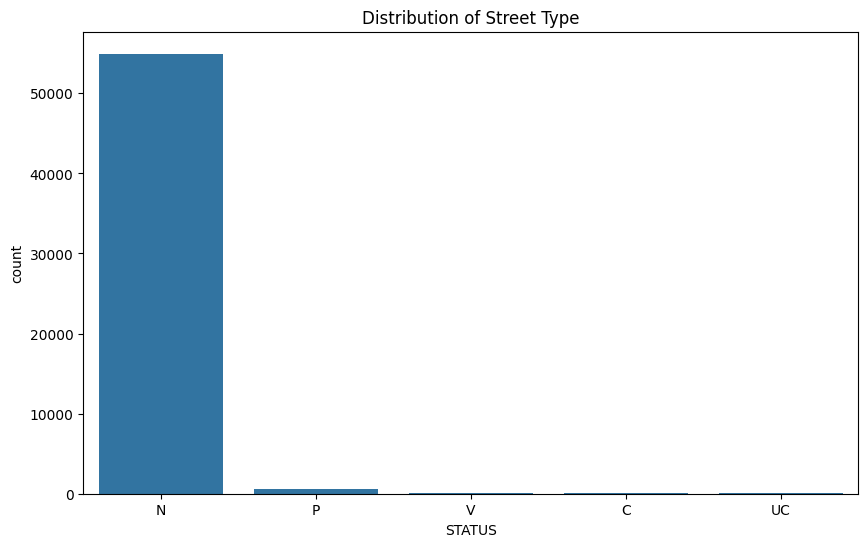

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(x='STATUS', data=street_data)
plt.title('Distribution of Street Type')
plt.show()

<div dir="rtl">نلاحظ أن معظم قيم العمود STATUS هي N (54949) وهذه القيمة عبارة عن NO STATUS، هذا يعني أن معظم الشوارع لا يوجد لها حالة معين، لذلك يمكننا تجاهل العمود بالكامل <div>

In [119]:
street_data.drop(['STATUS'], axis=1, inplace=True)

In [120]:
street_data.shape

(55747, 9)

In [121]:
street_data.describe()

,LENGTH,SHAPE_LEN
count,55747.000000,55747.000000
mean,422.083657,422.083019
std,234.316376,234.314867
min,6.911068,6.911054
25%,312.710726,312.710723
50%,336.150284,336.149944
75%,652.164814,652.164807
max,8959.034042,8959.034057


<div dir="rtl">نلاحظ ان العمودين LENGTH و SHAPE_LENGTH قيمهما متساوية، لذلك يمكننا تجاهل أحدهما<div>

In [122]:
street_data.drop(['SHAPE_LEN'], axis=1, inplace=True)

In [123]:
street_data.shape

(55747, 8)

In [124]:
street_data.describe(include='object')

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,TIERED,DIR_TRAVEL
count,55747,55293,55293,54493,55747,55747,55747
unique,55747,4,1649,22,11,2,3
top,MULTILINESTRING ((-87.63187018232667 41.780809...,W,WESTERN,AVE,4,N,B
freq,1,20941,391,25735,37506,55595,36455


In [125]:
street_data.isnull().sum()

the_geom         0
PRE_DIR        454
STREET_NAM     454
STREET_TYP    1254
CLASS            0
TIERED           0
DIR_TRAVEL       0
LENGTH           0
dtype: int64

<div dir="rtl"> لا يمكننا التنبؤ بأسماء الشوارع لذلك سنقوم بحذف الاسطر التي لا تحتوي على اسم الشارع <div>

In [126]:
street_data.dropna(subset = ['STREET_NAM'], inplace=True)

In [127]:
street_data[['STREET_NAM', 'PRE_DIR']].isnull().sum()

STREET_NAM    0
PRE_DIR       0
dtype: int64

<div dir="rtl">تم حذف ال missing values الموجودة في العمود PRE_DIR، هذا يعني أنهم موجودين بنفس الاسطر، وتم حذف اسم الشارع مع اتجاهه<div>

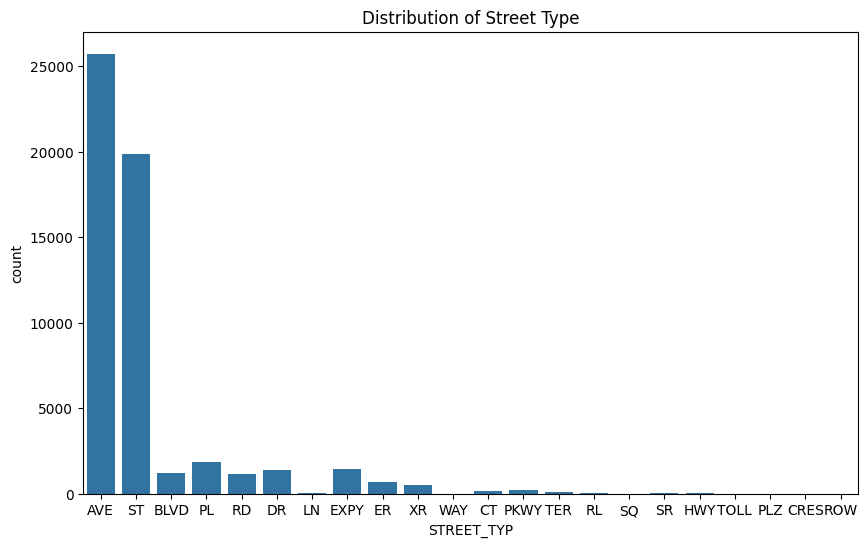

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(x='STREET_TYP', data=street_data)
plt.title('Distribution of Street Type')
plt.show()

<div dir="rtl">بما أن قيم العمود STREET_TYP هي catigorical بالإضافة الى أنها ليست ordinal سنستخدم قيمة ال mod لملء ال  missing values <div>

In [129]:
top_freq_value = cat_columns['STREET_TYP'].mode()[0]
print(f'Most Frequent STREET_TYP value: {top_freq_value}')
street_data['STREET_TYP'].fillna(value=top_freq_value, inplace=True)

Most Frequent STREET_TYP value: AVE


In [130]:
street_data['STREET_TYP'].isnull().sum()

0

In [131]:
street_data.isnull().sum()

the_geom      0
PRE_DIR       0
STREET_NAM    0
STREET_TYP    0
CLASS         0
TIERED        0
DIR_TRAVEL    0
LENGTH        0
dtype: int64

### [2] chicago-police-beat-boundries

In [132]:
police_data

,the_geom,DISTRICT,SECTOR,BEAT,BEAT_NUM
0,MULTIPOLYGON (((-87.7047252651434 41.975774430...,17,1,1,1713
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,0,3100
2,MULTIPOLYGON (((-87.90684167275818 41.97656175...,16,5,5,1651
3,MULTIPOLYGON (((-87.64491798475646 41.96972709...,19,1,1,1914
4,MULTIPOLYGON (((-87.63724132684592 41.96598776...,19,1,1,1915
...,...,...,...,...,...
272,MULTIPOLYGON (((-87.58879491369598 41.78612259...,3,1,1,314
273,MULTIPOLYGON (((-87.67917077210467 41.78656347...,8,2,2,825
274,MULTIPOLYGON (((-87.6085394544142 41.785829320...,3,1,1,313
275,MULTIPOLYGON (((-87.69354469346045 41.78458419...,8,2,2,823


In [133]:
police_data.columns

Index(['the_geom', 'DISTRICT', 'SECTOR', 'BEAT', 'BEAT_NUM'], dtype='object')

In [134]:
info_df = pd.DataFrame()
info_df['missing_val'] = police_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / police_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
the_geom,0,0
DISTRICT,0,0
SECTOR,0,0
BEAT,0,0
BEAT_NUM,0,0


In [135]:
police_data.nunique()

the_geom    277
DISTRICT     23
SECTOR        5
BEAT          5
BEAT_NUM    275
dtype: int64

<div dir="rtl">نلاحظ وجود قيم مكررة في العمود BEAT_NUM، لنكتشفها<div>

In [136]:
police_data['BEAT_NUM'].value_counts()

BEAT_NUM
3100    3
2512    1
1813    1
2522    1
2525    1
       ..
1513    1
1115    1
212     1
213     1
312     1
Name: count, Length: 275, dtype: int64

In [137]:
police_data[police_data['BEAT_NUM'] == 3100]

,the_geom,DISTRICT,SECTOR,BEAT,BEAT_NUM
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,0,3100
55,MULTIPOLYGON (((-87.82817787225841 41.98384222...,31,0,0,3100
263,MULTIPOLYGON (((-87.6912309678218 41.698985802...,31,0,0,3100


<div dir="rtl">القيم نفسها مكررة في الاسطر الثلاثة، لذلك سنقوم بحذف الاسطر المكررة<div>

In [138]:
police_data.drop([55, 263], inplace = True)

In [139]:
police_data.shape

(275, 5)

In [140]:
police_data[['BEAT', 'SECTOR']].drop_duplicates()

,BEAT,SECTOR
0,1,1
1,0,0
2,5,5
6,3,3
8,2,2


<div dir="rtl">العمودين BEATو SECTOR فيهما نفس القيم، لذلك يمكننا الاستغناء عن أحدهما<div>

In [141]:
police_data.drop('SECTOR',axis = 1, inplace = True)

In [142]:
police_data.dtypes

the_geom    object
DISTRICT     int64
BEAT         int64
BEAT_NUM     int64
dtype: object

In [143]:
police_data.describe()

,DISTRICT,BEAT,BEAT_NUM
count,275.000000,275.000000,275.000000
mean,11.985455,2.043636,1221.680000
std,7.075697,0.911156,707.742272
min,1.000000,0.000000,111.000000
25%,6.000000,1.000000,632.500000
50%,11.000000,2.000000,1125.000000
75%,18.000000,3.000000,1811.500000
max,31.000000,5.000000,3100.000000


In [144]:
police_data[["DISTRICT", "BEAT"]].groupby(['BEAT']).count()

,DISTRICT
BEAT,
0,1
1,90
2,90
3,89
5,5


<div dir="rtl">الدوائر في العمود DISTRICT متوزعة بشكل متساوي بين المناطق  1, 2, 3<div>

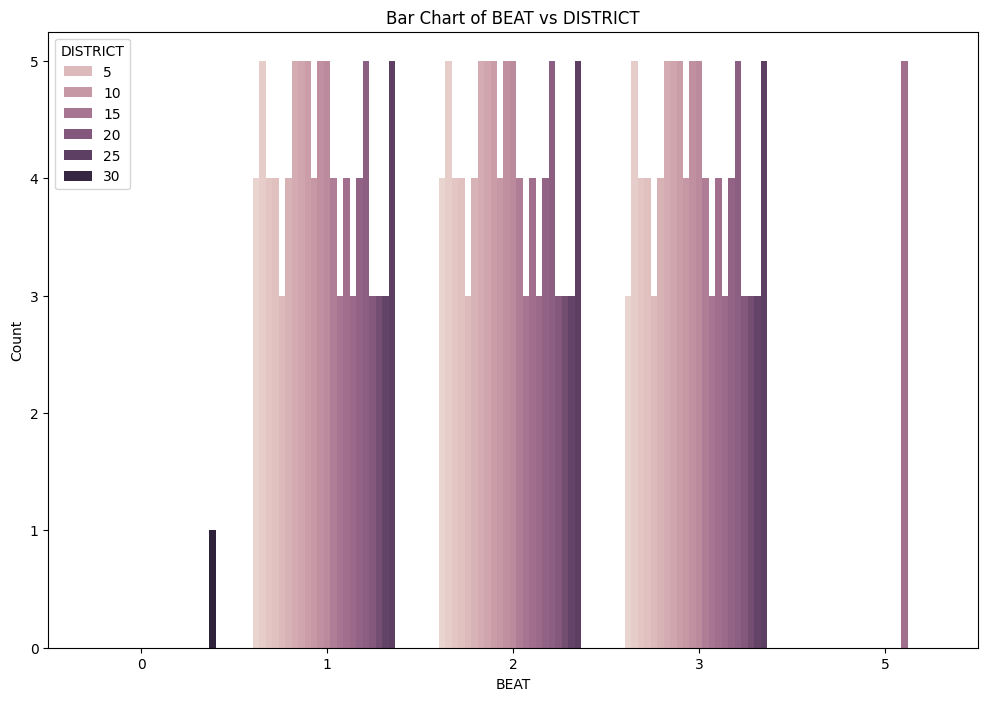

In [145]:
plt.figure(figsize=(12, 8))
sns.countplot(data=police_data, x='BEAT', hue='DISTRICT')
plt.title('Bar Chart of BEAT vs DISTRICT')
plt.xlabel('BEAT')
plt.ylabel('Count')
plt.legend(title='DISTRICT')
plt.show()

### [3] chicago-CBD-boundary

In [146]:
cbd_data

,the_geom,OBJECTID,SUM_AREA,NAME,AREA,LEN,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.62405822532047 41.90406015...,1,1.045633e+08,Central Business District,0,0,1.122806e+08,61725.295967


<div dir="rtl">من الواضح أنه يمكن تجاهل الأعمدة التالية OBJECTID,AREA, LEN<div>

In [147]:
cbd_data.drop(['OBJECTID', 'AREA', 'LEN'], axis = 1, inplace = True)

### [4] traffic-crashes-people

In [148]:
origin_people_data

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808600,P382511,PASSENGER,9d3f0c15dd51b93fffae416782b4e9897c3227a9478848...,1646504.0,12/23/2023 08:25:00 PM,4.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808601,P382512,PASSENGER,9d3f0c15dd51b93fffae416782b4e9897c3227a9478848...,1646507.0,12/23/2023 08:25:00 PM,3.0,CHICAGO,IL,60644,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808602,P382517,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,3.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808603,P382518,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,4.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
origin_people_data.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [150]:
people_data = origin_people_data.copy()

<div dir="rtl">مبدئياً وبعد الاستعانة بخبير، سنقوم بتجاهل عدد من الأعمدة<div>
  <div dir="rtl"> SEAT_NO, HOSPITAL, EMS_AGENCY, EMS_RUN_NO: قد لا يكون مفيدا بشكل مباشر بالتحليل<div>
 <div dir="rtl">ZIPCODE, DRIVERS_LICENSE_STATE: ليس مفيدا للتحليل الأساسي<div>   
  <div dir="rtl">  PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION: قد تكون مهمة فقط إذا كان التحليل يركز على حوادث المشاة والدراجات <div>
  <div dir="rtl">  CITY, STATE, ZIPCODE: ما يهمنا بالتحليل هو مكان الحادث وليس عناوين الاشخاص، لذلك سنقوم بتجاهلها أيضا. <div>

In [151]:
people_data.drop(['SEAT_NO', 'HOSPITAL', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'ZIPCODE', 'DRIVERS_LICENSE_STATE',
                  'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'STATE', 'CITY'],
                 axis = 1, inplace = True)

In [152]:
origin_people_data.shape

(1808605, 29)

In [153]:
people_data.shape

(1808605, 18)

In [154]:
info_df = pd.DataFrame()
info_df['missing_val'] = people_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / people_data.shape[0] * 100).round().astype(int)
info_df['dtype'] = people_data.dtypes
info_df

,missing_val,missing_val_ratio,dtype
PERSON_ID,0,0,object
PERSON_TYPE,0,0,object
CRASH_RECORD_ID,0,0,object
VEHICLE_ID,36177,2,float64
CRASH_DATE,0,0,object
SEX,29978,2,object
AGE,527939,29,float64
DRIVERS_LICENSE_CLASS,922585,51,object
SAFETY_EQUIPMENT,5061,0,object
AIRBAG_DEPLOYED,34799,2,object


<div dir="rtl">نسبة ال missing values في العمودين BAC_RESULT VALUE و CELL_PHONE_USE هي 100% لذلك سنقوم بتجاهلهما أيضا<div>

In [155]:
people_data.drop(['BAC_RESULT VALUE', 'CELL_PHONE_USE'], axis = 1, inplace = True)

In [156]:
people_data.describe(include='object')

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
count,1808605,1808605,1808605,1808605,1778627,886020,1803544,1773806,1786152,1807876,1439786,1439240,1440769,1440768
unique,1808605,6,822158,540242,3,281,19,7,5,5,20,14,12,4
top,O749947,DRIVER,31ecf6862c691ff12d3856213b902c146b07337b42a569...,12/29/2020 05:00:00 PM,M,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
freq,1,1407381,61,72,934741,771298,851765,925049,1668498,1650713,514550,727491,937426,1419706


In [157]:
people_data['DRIVER_ACTION'].value_counts()

DRIVER_ACTION
NONE                                 514550
UNKNOWN                              362903
FAILED TO YIELD                      131175
OTHER                                128850
FOLLOWED TOO CLOSELY                  85292
IMPROPER BACKING                      42760
IMPROPER TURN                         37768
IMPROPER LANE CHANGE                  36968
IMPROPER PASSING                      32157
DISREGARDED CONTROL DEVICES           25411
TOO FAST FOR CONDITIONS               21651
WRONG WAY/SIDE                         5773
IMPROPER PARKING                       5310
OVERCORRECTED                          2685
EVADING POLICE VEHICLE                 2296
CELL PHONE USE OTHER THAN TEXTING      2118
EMERGENCY VEHICLE ON CALL              1320
TEXTING                                 567
STOPPED SCHOOL BUS                      172
LICENSE RESTRICTIONS                     60
Name: count, dtype: int64

In [158]:
people_data['DRIVER_VISION'].value_counts()

DRIVER_VISION
NOT OBSCURED              727491
UNKNOWN                   677011
OTHER                      14317
MOVING VEHICLES             8160
PARKED VEHICLES             5022
WINDSHIELD (WATER/ICE)      3973
BLINDED - SUNLIGHT          1705
TREES, PLANTS                577
BUILDINGS                    515
BLINDED - HEADLIGHTS         154
BLOWING MATERIALS            102
HILLCREST                     95
EMBANKMENT                    83
SIGNBOARD                     35
Name: count, dtype: int64

In [159]:
people_data['PHYSICAL_CONDITION'].value_counts()

PHYSICAL_CONDITION
NORMAL                          937426
UNKNOWN                         476732
IMPAIRED - ALCOHOL                6185
REMOVED BY EMS                    5283
OTHER                             4190
FATIGUED/ASLEEP                   3782
EMOTIONAL                         3548
ILLNESS/FAINTED                   1316
HAD BEEN DRINKING                 1050
IMPAIRED - DRUGS                   695
IMPAIRED - ALCOHOL AND DRUGS       384
MEDICATED                          178
Name: count, dtype: int64

In [160]:
people_data['BAC_RESULT'].value_counts()

BAC_RESULT
TEST NOT OFFERED                   1419706
TEST REFUSED                         15015
TEST PERFORMED, RESULTS UNKNOWN       3481
TEST TAKEN                            2566
Name: count, dtype: int64

<div dir="rtl">معظم قيم عمود ال DRIVER_VISION هي NOT OBSCUREDو UNKNOWN بالإضافة إلى 20% عبارة عن missing values  هذا يعني أن الرؤية ليس لها تأثير كبير على الحوادث، لذلك يمكننا تجاهل العمود.<div>
<div dir="rtl">معظم قيم عمود ال DRIVER_ACTION هي NONEو UNKNOWNو OTHER بالإضافة إلى 20% عبارة عن missing valuesK  هذا يعني أن الرؤية ليس لها تأثير كبير على الحوادث، لذلك يمكننا تجاهل العمود.<div>
<div dir="rtl">معظم قيم عمود ال PHYSICAL_CONDITION هي NORMALو UNKNOWN بالإضافة إلى 20% عبارة عن missing valuesK  هذا يعني أن الرؤية ليس لها تأثير كبير على الحوادث، لذلك يمكننا تجاهل العمود.<div>
<div dir="rtl">بالنسبة للعمود BAC_RESULT نلاحظ انه عدد الاختبارات التي تم اخذها ونتائجها معروفة قليلة جدا (2566)، بالإضافة الى اننا قمنا بتجاهل عمود النتائج ايضا.<div>
<div dir="rtl">وفقا لما سبق سنقوم بتجاهل الاعمدة المذكورة اعلاه<div>

In [161]:
people_data.drop(['DRIVER_VISION', 'DRIVER_ACTION', 'PHYSICAL_CONDITION', 'BAC_RESULT'], axis = 1, inplace = True)

In [162]:
people_data.shape

(1808605, 12)

<div dir="rtl">سنبدأ بعمود VEHICLE_ID.<div>

In [163]:
people_data['VEHICLE_ID'].isnull().sum()

36177

In [164]:
vehicles_data_copy = vehicles_data.copy()
vehicles_data_copy.dropna(subset = ['VEHICLE_ID'], inplace = True)
vehicles_data_copy['VEHICLE_ID'].shape

(1642419,)

In [165]:
vehicles_data_copy['VEHICLE_ID'].isnull().sum()

0

<div dir="rtl">بما ان العمودين VEHICLE_ID و CRASH_RECORD_ID مشتركين بين الجدولين people_data و vehicle_data سأقوم بمعالجة ال missing values به بالاستعانة بالعمود CRASH_RECORD_ID (كونه لا يحتوي على missing values) كما هو موضح بالكود التالي:<div>

In [166]:
# استخراج قيم CRASH_RECORD_ID حيث تكون القيم في VEHICLE_ID مفقودة في people_data
missing_vehicle_ids = people_data[people_data['VEHICLE_ID'].isnull()]['CRASH_RECORD_ID']

# استخراج القيم المقابلة في VEHICLE_ID من الجدول الآخر vehicles_data بناءً على القيم المستخرجة من CRASH_RECORD_ID
corresponding_vehicle_ids = vehicles_data_copy[vehicles_data_copy['CRASH_RECORD_ID'].isin(missing_vehicle_ids)][['CRASH_RECORD_ID', 'VEHICLE_ID']]

# دمج القيم المستخرجة مع جدول people_data
people_data = people_data.merge(corresponding_vehicle_ids, on='CRASH_RECORD_ID', how='left', suffixes=('', '_new'))

# تعبئة القيم المفقودة في VEHICLE_ID باستخدام القيم المستخرجة
people_data['VEHICLE_ID'].fillna(people_data['VEHICLE_ID_new'], inplace=True)

# حذف العمود المؤقت
people_data.drop(columns=['VEHICLE_ID_new'], inplace=True)

# عرض عدد القيم المفقودة بعد الدمج
missing_after_merge = people_data['VEHICLE_ID'].isnull().sum()
print(f'Missing values after merge: {missing_after_merge}')

Missing values after merge: 168


<div dir="rtl">سنقوم بحذف ما تبقى من ال missing values، كونه عبارة عن ID لذلك هناك صعوبة في معالجتها <div>

In [167]:
people_data.dropna(subset=['VEHICLE_ID'], inplace=True)

In [168]:
people_data['VEHICLE_ID'].isnull().sum()

0

In [169]:
info_df = pd.DataFrame()
info_df['missing_val'] = people_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / people_data.shape[0] * 100).round().astype(int)
info_df['dtype'] = people_data.dtypes
info_df

,missing_val,missing_val_ratio,dtype
PERSON_ID,0,0,object
PERSON_TYPE,0,0,object
CRASH_RECORD_ID,0,0,object
VEHICLE_ID,0,0,float64
CRASH_DATE,0,0,object
SEX,30365,2,object
AGE,530639,29,float64
DRIVERS_LICENSE_CLASS,929319,51,object
SAFETY_EQUIPMENT,5582,0,object
AIRBAG_DEPLOYED,37257,2,object


<div dir="rtl">الان عمود ال AGE<div>
    <div dir="rtl">بداية سيتم معالجة ال missing values<div>

In [170]:
people_data['AGE'].value_counts()

AGE
 25.0     36187
 26.0     36095
 27.0     36034
 28.0     35507
 24.0     34960
          ...  
 106.0        2
-49.0         1
-47.0         1
-40.0         1
-59.0         1
Name: count, Length: 117, dtype: int64

<div dir="rtl">سيتم تعبئة ال missing values بقيمة ال mean بناء على قيم العمود PERSON_TYPE<div>

In [171]:
persons_ages_avg = people_data.groupby('PERSON_TYPE')['AGE'].mean()
persons_ages_avg

PERSON_TYPE
BICYCLE                33.338052
DRIVER                 40.092047
NON-CONTACT VEHICLE    42.382609
NON-MOTOR VEHICLE      40.809160
PASSENGER              27.967696
PEDESTRIAN             38.482529
Name: AGE, dtype: float64

In [172]:
# تعبئة القيم المفقودة في عمود AGE باستخدام القيم المتوسطة لكل نوع
for person_type in persons_ages_avg.index:
    # تحديد القيم المتوسطة للأعمار لكل نوع
    age_avg = persons_ages_avg[person_type]

    # تحديد الصفوف التي تحتاج إلى تعبئة
    mask = (people_data['PERSON_TYPE'] == person_type) & (people_data['AGE'].isnull())

    # تحديث القيم المفقودة باستخدام القيم المتوسطة
    people_data.loc[mask, 'AGE'] = age_avg

# التأكد من تعبئة القيم المفقودة
print(people_data['AGE'].isnull().sum())


0


<div dir="rtl">معالجة ال noisy data<div>

In [173]:
people_data[(people_data['AGE'] <= 0) | (people_data['AGE'] > 100)]['AGE'].count()

14539

<div dir="rtl">سيتم استخدام طريقة clip وهي مشابهة لل Binning by boundaries لكن الفرق أنه يمكننا تحديد الحدود الدنيا والعليا للمجموعة بشكل عام، بينما بال Binning كنا نحدد فقط عدد ال bins <div>
<div dir="rtl">مثال على طريقة عمل clip function:<div>

![Image](https://media.geeksforgeeks.org/wp-content/uploads/1-433.png)
Clip in range (-4, 9)
![Image](https://media.geeksforgeeks.org/wp-content/uploads/1-434.png)

In [174]:
# تحديد النطاق المطلوب
lower_bound = 15 #تم تحديدها من 15 لانه يتم منح رخصة القيادة ابتداء من عمر 15 سنة فما فوق
upper_bound = 100 #اللي عمرو فوق 100 مو قادر يطلع من بيتو
bins = 25 # افضل قيمة بعد التجريب

# تقييد القيم لتكون داخل النطاق المحدد
people_data['AGE'] = people_data['AGE'].clip(lower=lower_bound, upper=upper_bound)

# حساب حدود ال bin
bin_boundaries = pd.cut(people_data['AGE'], bins, labels=False, retbins=True)[1]
bin_boundaries

array([ 14.915,  18.4  ,  21.8  ,  25.2  ,  28.6  ,  32.   ,  35.4  ,
        38.8  ,  42.2  ,  45.6  ,  49.   ,  52.4  ,  55.8  ,  59.2  ,
        62.6  ,  66.   ,  69.4  ,  72.8  ,  76.2  ,  79.6  ,  83.   ,
        86.4  ,  89.8  ,  93.2  ,  96.6  , 100.   ])

In [175]:
# تطبيق العملية
people_data['Smoothed_AGE'] = people_data['AGE'].apply(lambda x: bin_boundaries[np.argmin(np.abs(x - bin_boundaries))])

# حذف العمود Smoothed_AGE
people_data.drop(['Smoothed_AGE'], axis = 1, inplace = True)

In [176]:
people_data[(people_data['AGE'] <= 0) | (people_data['AGE'] > 100)]['AGE'].count()

0

<div dir="rtl">ملاحظة: تم تجريب العديد من الطرق وكانت هذه الطريقة الانسب حسب رؤيتنا<div>
    <div dir="rtl">الان عمود ال SEX<div>

In [177]:
people_data['SEX'].unique()

array(['M', 'X', 'F', nan], dtype=object)

In [178]:
pivot_table = people_data[people_data['SEX'].isin(['M', 'X', 'F'])].pivot_table(index='SEX', columns='PERSON_TYPE', values='AGE', aggfunc=["mean"])
pivot_table

mean                                                   \
PERSON_TYPE    BICYCLE     DRIVER NON-CONTACT VEHICLE NON-MOTOR VEHICLE   
SEX                                                                       
F            32.581143  39.309215           44.818478         40.091109   
M            33.846481  40.794043           41.958870         41.505265   
X            33.323495  40.072864           42.382609         40.672893   

                                   
PERSON_TYPE  PASSENGER PEDESTRIAN  
SEX                                
F            30.082273  38.536239  
M            28.677793  39.538300  
X            27.568935  38.521524

 <div dir="rtl">نلاحظ أن النسب متقاربة، هذا يعني انه لاتوجد علاقة لل SEX مع ال AGR<div>

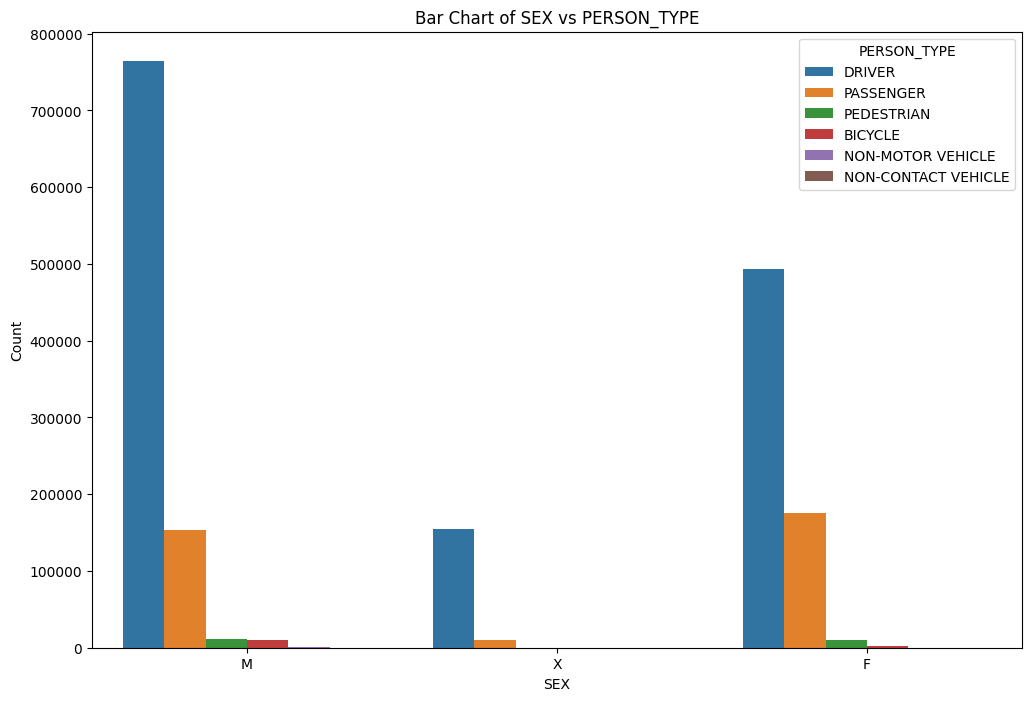

In [179]:
plt.figure(figsize=(12, 8))
sns.countplot(data=people_data, x='SEX', hue='PERSON_TYPE')
plt.title('Bar Chart of SEX vs PERSON_TYPE')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='PERSON_TYPE')
plt.show()

 <div dir="rtl">نلاحظ أن معظم السائقين هم ذكور، ونسبة الركاب الإناث اكبر من الذكور ولكن بفرق أقل.. وبناء عليه سنقوم بتعبئة القيم المفقودة لل DRIVER و ال BICYCLE ب Male ولل PASSENGER والبقية ب Femal<div>
     <div dir="rtl">وبالنسبة للقيمة X مبدئياً سنتركها كما هي. <div>

In [180]:
people_data.loc[(people_data['PERSON_TYPE'] == 'DEIVER') | (people_data['PERSON_TYPE'] == 'BICYCLE'), 'SEX'] = people_data.loc[(people_data['PERSON_TYPE'] == 'DEIVER') | (people_data['PERSON_TYPE'] == 'BICYCLE'), 'SEX'].fillna('M')
driver_bicyle_null = people_data[(people_data['PERSON_TYPE'] == 'DEIVER') | (people_data['PERSON_TYPE'] == 'BICYCLE')]['SEX'].isnull().sum()
print(f'null values in DRIVER and BICYCLE: {driver_bicyle_null}')

null values in DRIVER and BICYCLE: 0


In [181]:
people_data['SEX'].fillna(value = 'F', inplace = True)
people_data['SEX'].isnull().sum()

0

 <div dir="rtl">للننتقل الى العمود DRIVERS_LICENSE_CLASS <div>

In [188]:
people_data['DRIVERS_LICENSE_CLASS'].value_counts()

DRIVERS_LICENSE_CLASS
D     774058
A      31680
C      24294
B      24173
DM     13309
       ...  
PP         1
C2         1
D6         1
A+         1
JR         1
Name: count, Length: 281, dtype: int64

In [193]:
people_data['DRIVERS_LICENSE_CLASS'].unique()

array(['D', nan, 'B', '9', 'A', 'BM', 'DM', 'AM', 'C', '99', 'CO', 'DL',
       'DV', 'O', 'UN', 'AB', 'CB', 'DA', 'CD', 'D*', 'E', 'NO', 'M', 'X',
       'CM', '`', 'U', 'UK', 'F', 'IP', '1', 'G', 'TV', 'S', 'EM', '3',
       '0', 'R', 'G2', 'L', 'CP', 'EO', 'PS', '10', 'LM', '00', 'DE',
       'CA', 'CL', 'OP', 'DD', 'N', 'P', ']', 'BE', 'K', 'PC', 'DF', 'IL',
       'AC', 'XD', '4D', 'NN', 'ID', 'D`', 'MC', 'J', 'C*', 'AL', 'CR',
       'A*', 'P1', 'H', 'CJ', 'B*', 'Z', '5', 'RG', 'T', '`D', 'ND', 'PB',
       'BC', 'RV', 'OL', '2', 'EC', 'NT', '02', 'OR', 'GM', 'SU', 'BD',
       'DC', 'AD', 'GE', 'V', 'DQ', 'IF', 'TX', 'PD', 'KL', 'TL', 'LP',
       '2B', 'W', 'A3', 'TD', '1F', ',D', '4A', 'I', 'LA', 'CC', 'BF',
       '-', 'ST', '3E', 'VL', 'HZ', 'TM', 'RE', 'PE', '9A', 'DN', 'P2',
       'DU', 'LL', 'MA', 'D1', '31', 'C1', 'BN', '16', 'DR', '4', 'MD',
       '*D', '.D', '6A', '08', '0A', 'OM', 'EB', 'KM', 'D7', 'MB', 'BL',
       'XX', 'DS', 'E0', 'NV', 'Q', 'OA', 'EQ', 'AZ', 'O

In [190]:
pivot_table = people_data[people_data['DRIVERS_LICENSE_CLASS'].isin(['A', 'B', 'C', 'D', 'DM'])].pivot_table(index='DRIVERS_LICENSE_CLASS', columns='PERSON_TYPE', values='AGE', aggfunc=["mean"])
pivot_table

mean                    
PERSON_TYPE               DRIVER NON-CONTACT VEHICLE
DRIVERS_LICENSE_CLASS                               
A                      43.427849           48.875000
B                      46.395410           47.500000
C                      39.451491           34.490970
D                      40.209900           42.737054
DM                     44.739259           60.000000

In [197]:
people_data.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION'],
      dtype='object')

In [195]:
crashes_data['CRASH_DATE']

0         08/18/2023 12:50:00 PM
1         07/29/2023 02:45:00 PM
2         08/18/2023 05:58:00 PM
3         11/26/2019 08:38:00 AM
4         08/18/2023 10:45:00 AM
                   ...          
823952    07/18/2023 02:10:00 PM
823953    08/05/2023 01:00:00 PM
823954    11/05/2021 10:56:00 PM
823955    10/18/2020 12:03:00 AM
823956    03/15/2022 02:00:00 AM
Name: CRASH_DATE, Length: 823957, dtype: object

In [196]:
vehicles_data['CRASH_DATE']

0          12/06/2023 03:24:00 PM
1          12/06/2023 04:00:00 PM
2          12/06/2023 04:30:00 PM
3          12/10/2023 12:12:00 PM
4          12/10/2023 12:12:00 PM
                    ...          
1680887    03/31/2024 01:03:00 AM
1680888    03/31/2024 01:03:00 AM
1680889    03/31/2024 01:15:00 PM
1680890    03/31/2024 01:15:00 PM
1680891    03/31/2024 01:55:00 PM
Name: CRASH_DATE, Length: 1680892, dtype: object

### [2]

# [b] From Raw to Information

### [i]


### [ii]

### [iii]

### [iv]

### [v]

### [vi]

### [vii]

### [viii]

### [ix]

### [x]

### [xi]

### [xii]

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i]

### [ii]

### [iii]

### [iv]

## [b] Traffic Accidents History


### [i]

### [ii]

### [iii]

### [iv]

## [c] Spatial Analysis


### [i]

### [ii]

### [iii]

### [iv]

### [v]

### [vi]

## [d] Passengers Cases Analysis


### [i]

### [ii]

### [iii]

### [iv]

### [v]

## [e] Outlier Detection

### [i]

# Question [4]: Do What you Have to Do